# 6. 지역별 태양광 발전량 분석_v2

태양광 발전소 지역별 이용률 분석 및 시각화

- 임포트

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# '-'(마이너스) 기호 깨짐 예방
plt.rcParams['axes.unicode_minus'] = False

# jupyter notebook 에서 창 내부에 출력
%matplotlib inline

# 별도 창에 출력
# %matplotlib tk

## 1. 데이터 읽기 및 전처리

1) 설비 용량

In [2]:
df_PV_Info = pd.read_csv("./datasets/2. 남부/한국남부발전 태양광 설비용량.csv", encoding='cp949')
df_PV_Info

,발전소명,발전소 주소지,설치용량,설치각,설비용량,도/시,시/군/구,lat_do,lng_do,lat_si,lng_si
0,남제주소내,제주특별자치도 서귀포시 안덕면 화순해안로 106번길 55,196kW 모듈 :250W x 784 인버터 : 100kW x 2EA,설치각 : 30˚,196,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
1,무릉리 (제주),제주특별자치도 서귀포시 대정읍 무릉리 1193-3 외 3필지,809.2kW 모듈 : 425W x 1904 인버터 : 100kW x 8EA,설치각 : 20˚,809,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
2,부산 수처리 건물,부산광역시 사하구 감천항로 7(감천동) 수처리실,"110.5kW 모듈 : 340Wⅹ325 인버터 : 100kW, 10.5kW",설치각 : 25˚ 입사각 : 23˚,110,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
3,"부산발전본부 1,400kW",부산광역시 사하구 감천항로 7(감천동),"1,400.475kW 모듈 : 355Wⅹ3,945 인버터 : 500kWⅹ3EA",설치각 : 25˚,1400,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
4,부산복합 2단계,부산광역시 사하구 감천항로 7(감천동),"501.84kW 모듈 : 340W x 1,476 인버터 : 600kW x 1EA",설치각 : 25˚,502,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
5,부산복합 자재창고,부산광역시 사하구 감천항로 7(감천동),187kW 모듈 : 300Wⅹ624 인버터 : 100kW x 2EA,설치각 : 27˚,187,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
6,부산복합,부산광역시 사하구 감천항로 7,"390kW 모듈 :170W x 1,155 인버터 : 100kW x 3EA, 50kW...",설치각 : 21˚~45˚,390,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
7,부산신항,부산광역시 강서구 성북동 1490,"115kW 모듈 :144Wp x 272, 100Wp x 384, 215Wp x 17...",설치각 : 17˚,115,부산광역시,강서구,35.179953,129.075236,37.550900,126.849700
8,부산역 선상 주차장,부산광역시 동구 초량3동 1187-1,"834kW 모듈 : 400W x 2086, 인버터 : 500kW x 2EA",설치각 : 3˚~23˚,834,부산광역시,동구,35.179953,129.075236,35.886500,128.635500
9,이천D(백사면B),경기도 이천시 백사면 도립리 141-1,"995kW 모듈 : 440W x 2272, 인버터 : 500kW X 2EA",설치각 : 25˚,995,경기도,이천시,37.275200,127.009500,37.280882,127.442913


In [3]:
df_PV_Info['발전소명']

0              남제주소내
1           무릉리 (제주)
2          부산 수처리 건물
3     부산발전본부 1,400kW
4           부산복합 2단계
5          부산복합 자재창고
6               부산복합
7               부산신항
8         부산역 선상 주차장
9          이천D(백사면B)
10           삼척 소내#4
11              삼척사택
12          삼척소내 # 3
13           삼척소내 #2
14            삼척소내#1
15          송당리 (제주)
16      신인천 1,2단계주차장
17       신인천 법사면 전망대
18          신인천 북측부지
19          신인천 본관옥상
20            신인천 소내
21           신인천 주차장
22         신인천 해수취수구
23          신풍리 (제주)
24        안동발전본부 2단계
25            안동발전본부
26              영월복합
27            영월철도부지
28           위미2리 제2
29           인천수산정수장
30            제주 용수리
31           하동공설운동장
32            하동군보건소
33             하동변전소
34             하동정수장
35           하동하수처리장
36           하동화력 #1
37           하동화력 #2
38           하동화력 #3
39           하동화력 #4
40           하동화력 #5
41           하동화력 #6
42        화촌주민참여형솔라팜
43             행원소수력
44               감우리
Name: 발전소명, dtype: object

In [4]:
# df_PV_Info['발전소명'].str.replace('부산발전본부 1,400kW','부산발전본부')
df_PV_Info['발전소명'].replace(['부산발전본부 1,400kW','삼척 소내#4','삼척소내 # 3','삼척소내#1'],
                           ['부산발전본부','삼척소내 #4','삼척소내 #3','삼척소내 #1'], inplace=True)
df_PV_Info

,발전소명,발전소 주소지,설치용량,설치각,설비용량,도/시,시/군/구,lat_do,lng_do,lat_si,lng_si
0,남제주소내,제주특별자치도 서귀포시 안덕면 화순해안로 106번길 55,196kW 모듈 :250W x 784 인버터 : 100kW x 2EA,설치각 : 30˚,196,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
1,무릉리 (제주),제주특별자치도 서귀포시 대정읍 무릉리 1193-3 외 3필지,809.2kW 모듈 : 425W x 1904 인버터 : 100kW x 8EA,설치각 : 20˚,809,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
2,부산 수처리 건물,부산광역시 사하구 감천항로 7(감천동) 수처리실,"110.5kW 모듈 : 340Wⅹ325 인버터 : 100kW, 10.5kW",설치각 : 25˚ 입사각 : 23˚,110,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
3,부산발전본부,부산광역시 사하구 감천항로 7(감천동),"1,400.475kW 모듈 : 355Wⅹ3,945 인버터 : 500kWⅹ3EA",설치각 : 25˚,1400,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
4,부산복합 2단계,부산광역시 사하구 감천항로 7(감천동),"501.84kW 모듈 : 340W x 1,476 인버터 : 600kW x 1EA",설치각 : 25˚,502,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
5,부산복합 자재창고,부산광역시 사하구 감천항로 7(감천동),187kW 모듈 : 300Wⅹ624 인버터 : 100kW x 2EA,설치각 : 27˚,187,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
6,부산복합,부산광역시 사하구 감천항로 7,"390kW 모듈 :170W x 1,155 인버터 : 100kW x 3EA, 50kW...",설치각 : 21˚~45˚,390,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
7,부산신항,부산광역시 강서구 성북동 1490,"115kW 모듈 :144Wp x 272, 100Wp x 384, 215Wp x 17...",설치각 : 17˚,115,부산광역시,강서구,35.179953,129.075236,37.550900,126.849700
8,부산역 선상 주차장,부산광역시 동구 초량3동 1187-1,"834kW 모듈 : 400W x 2086, 인버터 : 500kW x 2EA",설치각 : 3˚~23˚,834,부산광역시,동구,35.179953,129.075236,35.886500,128.635500
9,이천D(백사면B),경기도 이천시 백사면 도립리 141-1,"995kW 모듈 : 440W x 2272, 인버터 : 500kW X 2EA",설치각 : 25˚,995,경기도,이천시,37.275200,127.009500,37.280882,127.442913


발전소명으로 정렬

In [5]:
df_PV_Info['발전소명'].sort_values()

44             감우리
0            남제주소내
1         무릉리 (제주)
2        부산 수처리 건물
3           부산발전본부
6             부산복합
4         부산복합 2단계
5        부산복합 자재창고
7             부산신항
8       부산역 선상 주차장
11            삼척사택
14         삼척소내 #1
13         삼척소내 #2
12         삼척소내 #3
10         삼척소내 #4
15        송당리 (제주)
16    신인천 1,2단계주차장
17     신인천 법사면 전망대
19        신인천 본관옥상
18        신인천 북측부지
20          신인천 소내
21         신인천 주차장
22       신인천 해수취수구
23        신풍리 (제주)
25          안동발전본부
24      안동발전본부 2단계
26            영월복합
27          영월철도부지
28         위미2리 제2
9        이천D(백사면B)
29         인천수산정수장
30          제주 용수리
31         하동공설운동장
32          하동군보건소
33           하동변전소
34           하동정수장
35         하동하수처리장
36         하동화력 #1
37         하동화력 #2
38         하동화력 #3
39         하동화력 #4
40         하동화력 #5
41         하동화력 #6
43           행원소수력
42      화촌주민참여형솔라팜
Name: 발전소명, dtype: object

In [6]:
df_PV_Info.sort_values(by = ['발전소명'], inplace=True)

In [7]:
df_PV_Info

,발전소명,발전소 주소지,설치용량,설치각,설비용량,도/시,시/군/구,lat_do,lng_do,lat_si,lng_si
44,감우리,"충청북도 음성군 음성읍 감우리 23, 24","554.4kW 모듈 : 440W x 1,260 인버터 : 630kW x 1EA",설치각 : 20˚,554,충청북도,음성군,36.635700,127.491500,36.940000,127.690600
0,남제주소내,제주특별자치도 서귀포시 안덕면 화순해안로 106번길 55,196kW 모듈 :250W x 784 인버터 : 100kW x 2EA,설치각 : 30˚,196,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
1,무릉리 (제주),제주특별자치도 서귀포시 대정읍 무릉리 1193-3 외 3필지,809.2kW 모듈 : 425W x 1904 인버터 : 100kW x 8EA,설치각 : 20˚,809,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
2,부산 수처리 건물,부산광역시 사하구 감천항로 7(감천동) 수처리실,"110.5kW 모듈 : 340Wⅹ325 인버터 : 100kW, 10.5kW",설치각 : 25˚ 입사각 : 23˚,110,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
3,부산발전본부,부산광역시 사하구 감천항로 7(감천동),"1,400.475kW 모듈 : 355Wⅹ3,945 인버터 : 500kWⅹ3EA",설치각 : 25˚,1400,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
6,부산복합,부산광역시 사하구 감천항로 7,"390kW 모듈 :170W x 1,155 인버터 : 100kW x 3EA, 50kW...",설치각 : 21˚~45˚,390,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
4,부산복합 2단계,부산광역시 사하구 감천항로 7(감천동),"501.84kW 모듈 : 340W x 1,476 인버터 : 600kW x 1EA",설치각 : 25˚,502,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
5,부산복합 자재창고,부산광역시 사하구 감천항로 7(감천동),187kW 모듈 : 300Wⅹ624 인버터 : 100kW x 2EA,설치각 : 27˚,187,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
7,부산신항,부산광역시 강서구 성북동 1490,"115kW 모듈 :144Wp x 272, 100Wp x 384, 215Wp x 17...",설치각 : 17˚,115,부산광역시,강서구,35.179953,129.075236,37.550900,126.849700
8,부산역 선상 주차장,부산광역시 동구 초량3동 1187-1,"834kW 모듈 : 400W x 2086, 인버터 : 500kW x 2EA",설치각 : 3˚~23˚,834,부산광역시,동구,35.179953,129.075236,35.886500,128.635500


2) 태양광 발전량 데이터

In [8]:
# 파일 목록 가져오기
# os.listdir()
os.listdir('./datasets/2. 남부/')

['예외',
 '한국남부발전 태양광 설비용량.csv',
 '한국남부발전(주)_남제주소내 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산복합자재창고 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산수처리장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산신항 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산역선상주차장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산운동장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_송당리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천 1_2단계 주차장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천 북측부지 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천 주차장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천소내 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천전망대 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천해수구취수구 태양광발전실적_20220630.csv',
 '한국남부발전(주)_영월본부 태양광발전실적_20220630.csv',
 '한국남부발전(주)_영월철도부지 태양광발전실적_20220630.csv',
 '한국남부발전(주)_용수리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_위미2리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_인천수산정수장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_태양광발전 출자회사 발전정보_20220630.csv',
 '한국남부발전(주)_태양광발전기 사양정보_20220630.csv',
 '한국남부발전(주)_하동공설운동장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동변전소 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동보건소 태양광발전실적_20220630.csv',
 '한

In [9]:
# '발전실적'이 포함된 파일 목록
path = './datasets/2. 남부/'
file_list = os.listdir(path)
file_list_PV = [file for file in file_list if '발전실적' in file]
file_list_PV

['한국남부발전(주)_남제주소내 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산복합자재창고 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산수처리장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산신항 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산역선상주차장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산운동장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_송당리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천 1_2단계 주차장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천 북측부지 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천 주차장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천소내 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천전망대 태양광발전실적_20220630.csv',
 '한국남부발전(주)_신인천해수구취수구 태양광발전실적_20220630.csv',
 '한국남부발전(주)_영월본부 태양광발전실적_20220630.csv',
 '한국남부발전(주)_영월철도부지 태양광발전실적_20220630.csv',
 '한국남부발전(주)_용수리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_위미2리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_인천수산정수장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동공설운동장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동변전소 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동보건소 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동정수장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동하수처리장 태양광발전실적_20220630.csv',
 '한국남부발전(주)_행원소수력 태양광발전실적_202206

In [10]:
path + file_list_PV[0]

'./datasets/2. 남부/한국남부발전(주)_남제주소내 태양광발전실적_20220630.csv'

In [11]:
pd.read_csv(path + file_list_PV[0], encoding='cp949')

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별 kw),최소(시간별 kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2013-01-01,1,319.178,13.000,76.269,0,76.269,0.072,0.0,0.0,...,53.345,30.156,9.281,0.072,0.000,0.000,0.0,0,0,0
1,2013-01-02,1,586.312,24.000,110.257,0,110.257,0.121,0.0,0.0,...,88.563,43.293,11.595,0.121,0.000,0.000,0.0,0,0,0
2,2013-01-03,1,542.512,23.000,106.328,0,106.328,0.024,0.0,0.0,...,88.466,40.545,6.508,0.024,0.000,0.000,0.0,0,0,0
3,2013-01-04,1,697.027,29.000,118.333,0,118.333,0.482,0.0,0.0,...,96.710,67.663,23.768,0.482,0.000,0.000,0.0,0,0,0
4,2013-01-05,1,460.675,19.000,103.195,0,103.195,1.736,0.0,0.0,...,48.162,24.129,7.858,0.000,0.000,0.000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2022-06-26,1,0.000,0.000,0.000,0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0,0
3464,2022-06-27,1,0.000,0.000,0.000,0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0,0
3465,2022-06-28,1,0.000,0.000,0.000,0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0,0
3466,2022-06-29,1,0.000,0.000,0.000,0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0,0


In [12]:
# # 파일 읽기
# df1 = pd.read_csv(path + file_list_PV[0], encoding='cp949')

# # 시계열로 변환
# df1.index = pd.to_datetime(df1['년월일'])
# df1 = df1.drop(['년월일'], axis = 1)

# # 년도 및 발전량 데이터 추출
# df2 = df1[df1.index.year == 2021].iloc[:,7:]

# # 발전량 시간차 조정
# df2.shift(periods=1, axis=1,fill_value=0)

# # 발전량 추출
# df2.stack().values

In [87]:
idx = pd.date_range('2021-01-01 00:00:00','2021-12-31 23:00:00', freq='H')
df = pd.DataFrame(data=np.nan*np.ones((len(idx), len(file_list_PV))), index=idx)
df.index.name = 'datetime'
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
PV_name = []
for file in file_list_PV:
    PV_name.append(file.strip('한국남부발전(주)').strip('태양광발전실적_20220630.csv').rstrip())
    
PV_name

['남제주소내',
 '부산복합자재창고',
 '부산수처리장',
 '부산신항',
 '부산역선상주차장',
 '부산운동장',
 '송당리',
 '신인천 1_2단계 주차장',
 '신인천 북측부지',
 '신인천 주차장',
 '신인천소내',
 '신인천전망대',
 '신인천해수구취수구',
 '영월본부',
 '영월철도부지',
 '용수리',
 '위미2리',
 '인천수산정수장',
 '하동공설운동장',
 '하동변전소',
 '하동보건소',
 '하동정수장',
 '하동하수처리장',
 '행원소수력']

In [15]:
i = 0
for file in file_list_PV:
    
    
    # 파일 읽기
    df1 = pd.read_csv(path + file, encoding='cp949')
    
    # 시계열로 변환
    df1.index = pd.to_datetime(df1['년월일'])
    df1 = df1.drop(['년월일'], axis = 1)
    
     # 발전량 추출
    df.iloc[:,i] = df1[df1.index.year == 2021].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
    
    # 컬럼명 변경
    df.rename(columns={i:PV_name[i]}, inplace=True)
    
    i = i +1

In [16]:
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,영월철도부지,용수리,위미2리,인천수산정수장,하동공설운동장,하동변전소,하동보건소,하동정수장,하동하수처리장,행원소수력
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2) 태양광 발전량 데이터 2: 예외 발전소

In [17]:
path2 = './datasets/2. 남부/예외'
file_list2 = os.listdir(path2)
file_list_PV2 = [file for file in file_list2 if '발전실적' in file]
file_list_PV2

['한국남부발전(주)_무릉리 태양광발전실적_20220630.csv',
 '한국남부발전(주)_부산본부 태양광발전실적_20220630.csv',
 '한국남부발전(주)_삼척사택 태양광발전실적_20220531.csv',
 '한국남부발전(주)_삼척소내 태양광발전실적_20220630.csv',
 '한국남부발전(주)_안동소내 태양광발전실적_20220531.csv',
 '한국남부발전(주)_이천D(백사면B) 태양광발전실적_20220630.csv',
 '한국남부발전(주)_하동본부 태양광발전실적_20220630.csv',
 '한국남부발전(주)_화촌주민참여형 태양광발전실적_20220630.csv']

무릉리

In [18]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_무릉리 태양광발전실적_20220630.csv", encoding='cp949')
df1

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별_kw),최소(시간별_kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2021-05-01,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
1,2021-05-02,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
2,2021-05-03,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
3,2021-05-04,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
4,2021-05-05,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2022-06-26,1,1833.204,76.384,247.320,0,247.320,3.616,0,0,...,247.320,188.744,247.320,138.846,30.373,0.000,0,0,0,0
422,2022-06-27,1,1872.979,78.041,371.703,0,371.703,1.446,0,0,...,340.607,199.592,125.106,96.903,34.712,1.446,0,0,0,0
423,2022-06-28,1,1559.129,64.964,224.179,0,224.179,3.616,0,0,...,158.372,167.773,93.287,75.208,30.373,3.616,0,0,0,0
424,2022-06-29,1,2658.328,110.764,457.759,0,457.759,5.785,0,0,...,457.759,452.697,348.562,143.185,18.802,0.000,0,0,0,0


In [19]:
# df1.drop([0], axis=0)
df1.drop(np.arange(15), axis=0)

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별_kw),최소(시간별_kw),1,2,...,15,16,17,18,19,20,21,22,23,24
15,2021-05-16,1,610.344,25.431,159.095,0,159.095,5.062,0,0,...,61.468,159.095,55.683,11.571,5.062,0.000,0,0,0,0
16,2021-05-17,1,1675.556,69.815,326.144,0,326.144,0.723,0,0,...,250.213,326.144,240.088,160.541,32.542,0.723,0,0,0,0
17,2021-05-18,1,4127.062,171.961,621.916,0,621.916,13.017,0,0,...,420.878,400.629,297.218,147.524,36.158,0.000,0,0,0,0
18,2021-05-19,1,3905.775,162.741,587.927,0,587.927,0.723,0,0,...,363.025,219.117,112.089,57.853,30.373,0.723,0,0,0,0
19,2021-05-20,1,688.444,28.685,107.027,0,107.027,2.169,0,0,...,107.027,90.395,79.547,28.203,2.893,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2022-06-26,1,1833.204,76.384,247.320,0,247.320,3.616,0,0,...,247.320,188.744,247.320,138.846,30.373,0.000,0,0,0,0
422,2022-06-27,1,1872.979,78.041,371.703,0,371.703,1.446,0,0,...,340.607,199.592,125.106,96.903,34.712,1.446,0,0,0,0
423,2022-06-28,1,1559.129,64.964,224.179,0,224.179,3.616,0,0,...,158.372,167.773,93.287,75.208,30.373,3.616,0,0,0,0
424,2022-06-29,1,2658.328,110.764,457.759,0,457.759,5.785,0,0,...,457.759,452.697,348.562,143.185,18.802,0.000,0,0,0,0


In [20]:
df1 = df1.drop(np.arange(15), axis=0)

# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

 # 발전량 추출
PV_values = df1[df1.index.year == 2021].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values

PV_values

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
df['무릉리'] = np.concatenate((np.nan*np.zeros(365*24-len(PV_values)), PV_values), axis=0)

In [22]:
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,용수리,위미2리,인천수산정수장,하동공설운동장,하동변전소,하동보건소,하동정수장,하동하수처리장,행원소수력,무릉리
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='datetime'>

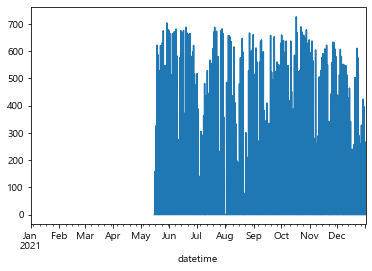

In [23]:
df['무릉리'].plot()

부산본부

In [24]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_부산본부 태양광발전실적_20220630.csv", encoding='cp949')
df1

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별 kw),최소(시간별 kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2013-01-01,1,988.740,41.000,198.180,0,198.180,0.108,0,0,...,147.708,65.196,14.652,0.108,0.000,0.00,0,0,0,0
1,2013-01-02,1,1267.920,53.000,265.644,0,265.644,0.036,0,0,...,160.884,77.148,14.400,0.036,0.000,0.00,0,0,0,0
2,2013-01-03,1,1259.316,52.000,271.584,0,271.584,0.180,0,0,...,177.912,63.288,14.832,0.216,0.000,0.00,0,0,0,0
3,2013-01-04,1,1386.864,58.000,286.020,0,286.020,0.072,0,0,...,185.292,93.780,18.576,0.072,0.000,0.00,0,0,0,0
4,2013-01-05,1,1408.356,59.000,297.612,0,297.612,0.144,0,0,...,130.392,79.488,20.052,0.144,0.000,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,2022-06-28,2,381.600,15.900,51.480,0,51.480,1.080,0,0,...,37.080,28.080,27.000,23.760,1.080,0.00,0,0,0,0
4743,2022-06-29,1,152.208,6.342,23.220,0,23.220,1.080,0,0,...,14.256,8.028,11.304,1.404,2.016,0.00,0,0,0,0
4744,2022-06-29,2,496.440,20.685,73.800,0,73.800,6.840,0,0,...,46.440,28.440,34.920,7.560,6.840,0.00,0,0,0,0
4745,2022-06-30,1,665.244,27.719,121.464,0,121.464,2.052,0,0,...,90.432,59.256,30.564,8.316,2.052,0.00,0,0,0,0


In [25]:
df1['호기'].unique()

array([1, 2], dtype=int64)

In [26]:
# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

In [27]:
df['부산본부 #1'] = df1[(df1['호기'] == 1) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['부산본부 #2'] = df1[(df1['호기'] == 2) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values

<AxesSubplot:xlabel='datetime'>

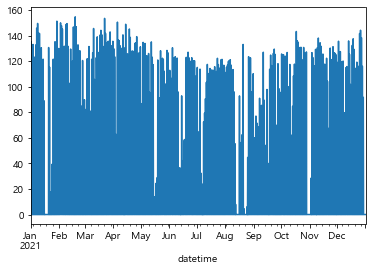

In [28]:
df['부산본부 #1'].plot()

<AxesSubplot:xlabel='datetime'>

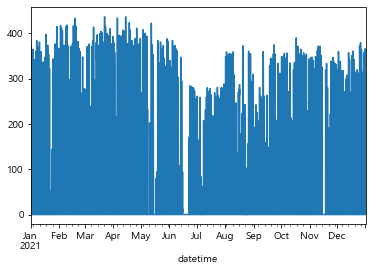

In [29]:
df['부산본부 #2'].plot()

삼척사택

In [30]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_삼척사택 태양광발전실적_20220531.csv", encoding='cp949')
df1

,구분,년월일,삼척사택 태양광(kwh)
0,1,2015-08-01,4968
1,2,2015-09-01,16740
2,3,2015-10-01,13626
3,4,2015-11-01,4122
4,5,2015-12-01,3330
...,...,...,...
77,78,2022-01-01,18792
78,79,2022-02-01,21492
79,80,2022-03-01,18324
80,81,2022-04-01,23382


In [31]:
# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)
df1

,구분,삼척사택 태양광(kwh)
년월일,,
2015-08-01,1,4968
2015-09-01,2,16740
2015-10-01,3,13626
2015-11-01,4,4122
2015-12-01,5,3330
...,...,...
2022-01-01,78,18792
2022-02-01,79,21492
2022-03-01,80,18324


In [32]:
df_PV_monthly = df1[df1.index.year == 2021].drop(['구분'], axis=1)
df_PV_monthly

,삼척사택 태양광(kwh)
년월일,
2021-01-01,15948
2021-02-01,17820
2021-03-01,16416
2021-04-01,20448
2021-05-01,17280
2021-06-01,15030
2021-07-01,16236
2021-08-01,12456
2021-09-01,5310


In [33]:
df['삼척사택'] = np.nan*np.zeros(365*24)
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,하동공설운동장,하동변전소,하동보건소,하동정수장,하동하수처리장,행원소수력,무릉리,부산본부 #1,부산본부 #2,삼척사택
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


삼척소재

In [34]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_삼척소내 태양광발전실적_20220630.csv", encoding='cp949')
df1

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별 kw),최소(시간별 kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2018-01-01,1,0.0,0.000,0.0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
1,2018-01-02,1,0.0,0.000,0.0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,2018-01-03,1,0.0,0.000,0.0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,2018-01-04,1,0.0,0.000,0.0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
4,2018-01-05,1,0.0,0.000,0.0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,2022-06-26,4,8917.2,371.550,1364.4,0,1364.4,5.4,0,0,...,1364.4,1229.4,732.6,358.2,91.8,5.4,0,0,0,0.0
5554,2022-06-27,4,4075.2,169.800,675.0,0,675.0,9.0,0,0,...,543.6,63.0,73.8,9.0,0.0,0.0,0,0,0,0.0
5555,2022-06-28,4,10153.8,423.075,1501.2,0,1501.2,10.8,0,0,...,1269.0,1096.2,748.8,243.0,99.0,10.8,0,0,0,0.0
5556,2022-06-29,4,4177.8,174.075,577.8,0,577.8,1.8,0,0,...,577.8,576.0,518.4,252.0,95.4,1.8,0,0,0,0.0


In [35]:
df1['호기'].unique()

array([1, 2, 3, 4], dtype=int64)

In [36]:
df1.columns

Index(['년월일', '호기', '총량(kw)', '평균(kw)', '최대(kw)', '최소(kw)', '최대(시간별 kw)',
       '최소(시간별 kw)', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24'],
      dtype='object')

In [37]:
# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

In [38]:
df['삼척소내 #1'] = df1[(df1['호기'] == 1) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['삼척소내 #2'] = df1[(df1['호기'] == 2) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['삼척소내 #3'] = df1[(df1['호기'] == 3) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['삼척소내 #4'] = df1[(df1['호기'] == 4) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values

In [39]:
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,하동하수처리장,행원소수력,무릉리,부산본부 #1,부산본부 #2,삼척사택,삼척소내 #1,삼척소내 #2,삼척소내 #3,삼척소내 #4
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='datetime'>

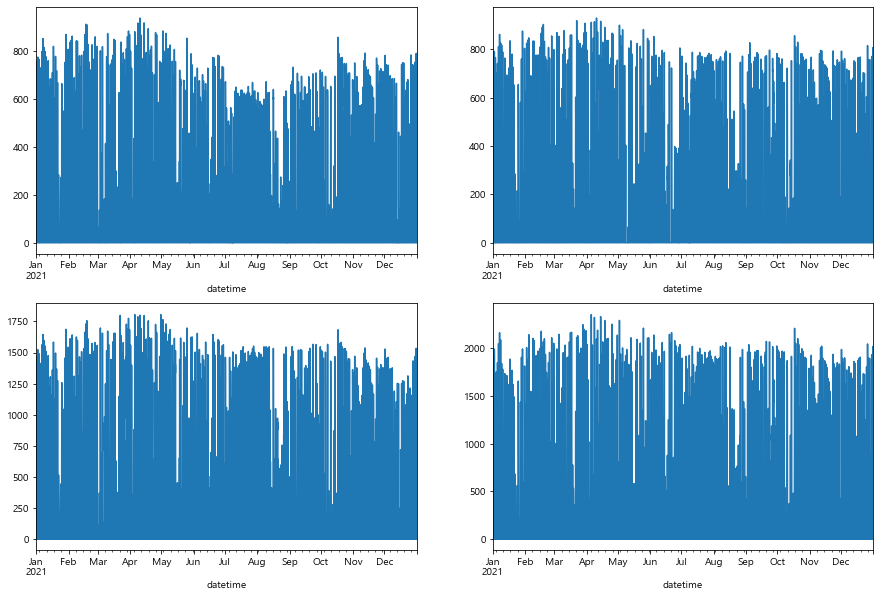

In [40]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
df['삼척소내 #1'].plot()
plt.subplot(2,2,2)
df['삼척소내 #2'].plot()
plt.subplot(2,2,3)
df['삼척소내 #3'].plot()
plt.subplot(2,2,4)
df['삼척소내 #4'].plot()

안동소내

In [41]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_안동소내 태양광발전실적_20220531.csv", encoding='cp949')
df1

,년월일,안동소내 태양광-1(kwh),안동소내 태양광-2(kwh)
0,2015-08-01,NaN,NaN
1,2015-09-01,NaN,NaN
2,2015-10-01,NaN,NaN
3,2015-11-01,NaN,NaN
4,2015-12-01,NaN,NaN
...,...,...,...
77,2022-01-01,11710.0,28460.0
78,2022-02-01,13085.0,33299.0
79,2022-03-01,12038.0,32249.0
80,2022-04-01,15042.0,40928.0


In [42]:
# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

In [43]:
df1

,안동소내 태양광-1(kwh),안동소내 태양광-2(kwh)
년월일,,
2015-08-01,NaN,NaN
2015-09-01,NaN,NaN
2015-10-01,NaN,NaN
2015-11-01,NaN,NaN
2015-12-01,NaN,NaN
...,...,...
2022-01-01,11710.0,28460.0
2022-02-01,13085.0,33299.0
2022-03-01,12038.0,32249.0


In [44]:
df_PV_monthly = pd.concat((df_PV_monthly,df1[df1.index.year == 2021]), axis=1)
df_PV_monthly

,삼척사택 태양광(kwh),안동소내 태양광-1(kwh),안동소내 태양광-2(kwh)
년월일,,,
2021-01-01,15948,10846.0,23713.0
2021-02-01,17820,11979.0,31376.0
2021-03-01,16416,12629.0,34368.0
2021-04-01,20448,14387.0,39450.0
2021-05-01,17280,12560.0,34905.0
2021-06-01,15030,13019.0,36386.0
2021-07-01,16236,13996.0,38797.0
2021-08-01,12456,10009.0,27780.0
2021-09-01,5310,10283.0,27964.0


In [45]:
df['안동소내 #1'] = np.nan*np.zeros(365*24)
df['안동소내 #2'] = np.nan*np.zeros(365*24)
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,무릉리,부산본부 #1,부산본부 #2,삼척사택,삼척소내 #1,삼척소내 #2,삼척소내 #3,삼척소내 #4,안동소내 #1,안동소내 #2
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN


이천D

In [46]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_이천D(백사면B) 태양광발전실적_20220630.csv", encoding='cp949')
df1

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별_kw),최소(시간별_kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2021-02-09,1,1816.500,75.688,724.026,0,724.026,0.289,0,0,...,724.026,524.651,214.706,38.110,0.0,0.0,0,0,0,0
1,2021-02-10,1,1925.407,80.225,503.173,0,503.173,0.795,0,0,...,199.592,231.194,59.588,19.959,0.0,0.0,0,0,0,0
2,2021-02-11,1,3835.339,159.806,658.218,0,658.218,3.905,0,0,...,616.492,407.716,171.171,33.338,0.0,0.0,0,0,0,0
3,2021-02-12,1,4263.161,177.632,721.495,0,721.495,3.037,0,0,...,643.972,479.526,214.055,43.173,0.0,0.0,0,0,0,0
4,2021-02-13,1,4403.888,183.495,728.220,0,728.220,5.424,0,0,...,660.605,485.745,214.344,43.462,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2022-06-26,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.0,0.0,0,0,0,0
503,2022-06-27,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.0,0.0,0,0,0,0
504,2022-06-28,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.0,0.0,0,0,0,0
505,2022-06-29,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.0,0.0,0,0,0,0


In [47]:
df1['호기'].unique()

array([1], dtype=int64)

In [48]:
# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

 # 발전량 추출
PV_values = df1[df1.index.year == 2021].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values

df['이천d'] = np.concatenate((np.nan*np.zeros(365*24-len(PV_values)), PV_values), axis=0)

In [49]:
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,부산본부 #1,부산본부 #2,삼척사택,삼척소내 #1,삼척소내 #2,삼척소내 #3,삼척소내 #4,안동소내 #1,안동소내 #2,이천d
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0


<AxesSubplot:xlabel='datetime'>

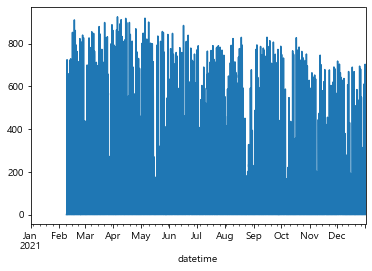

In [50]:
df['이천d'].plot()

하동본부

In [51]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_하동본부 태양광발전실적_20220630.csv", encoding='cp949')
df1

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별 kw),최소(시간별 kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2013-01-01,1,1681.560,70.000,443.520,0,443.520,0.120,0,0,...,110.400,130.680,39.600,0.120,0.000,0.000,0,0,0,0
1,2013-01-01,2,2852.100,119.000,696.960,0,696.960,72.360,0,0,...,212.760,223.380,79.920,0.000,0.000,0.000,0,0,0,0
2,2013-01-01,3,1381.608,58.000,371.304,0,371.304,1.080,0,0,...,95.544,108.576,40.104,1.080,0.000,0.000,0,0,0,0
3,2013-01-02,1,3206.760,134.000,574.080,0,574.080,1.080,0,0,...,469.800,228.840,48.840,1.080,0.000,0.000,0,0,0,0
4,2013-01-02,2,4597.380,192.000,825.480,0,825.480,3.240,0,0,...,611.100,376.200,135.900,3.240,0.000,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14100,2022-06-30,2,8403.840,350.160,1102.140,0,1102.140,71.640,0,0,...,1017.900,814.500,585.720,310.680,75.960,0.000,0,0,0,0
14101,2022-06-30,3,3089.160,128.715,396.000,0,396.000,1.080,0,0,...,395.712,327.888,267.984,163.224,38.952,1.080,0,0,0,0
14102,2022-06-30,4,5241.408,218.392,690.048,0,690.048,0.384,0,0,...,658.752,537.504,390.624,195.360,31.200,0.000,0,0,0,0
14103,2022-06-30,5,5399.520,224.980,737.088,0,737.088,2.304,0,0,...,695.232,560.448,434.592,237.888,57.312,2.304,0,0,0,0


In [52]:
df1['호기'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [53]:
# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

In [54]:
df['하동본부 #1'] = df1[(df1['호기'] == 1) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['하동본부 #2'] = df1[(df1['호기'] == 2) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['하동본부 #3'] = df1[(df1['호기'] == 3) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['하동본부 #4'] = df1[(df1['호기'] == 4) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['하동본부 #5'] = df1[(df1['호기'] == 5) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values
df['하동본부 #6'] = df1[(df1['호기'] == 6) & (df1.index.year == 2021)].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values

In [55]:
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,삼척소내 #4,안동소내 #1,안동소내 #2,이천d,하동본부 #1,하동본부 #2,하동본부 #3,하동본부 #4,하동본부 #5,하동본부 #6
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='datetime'>

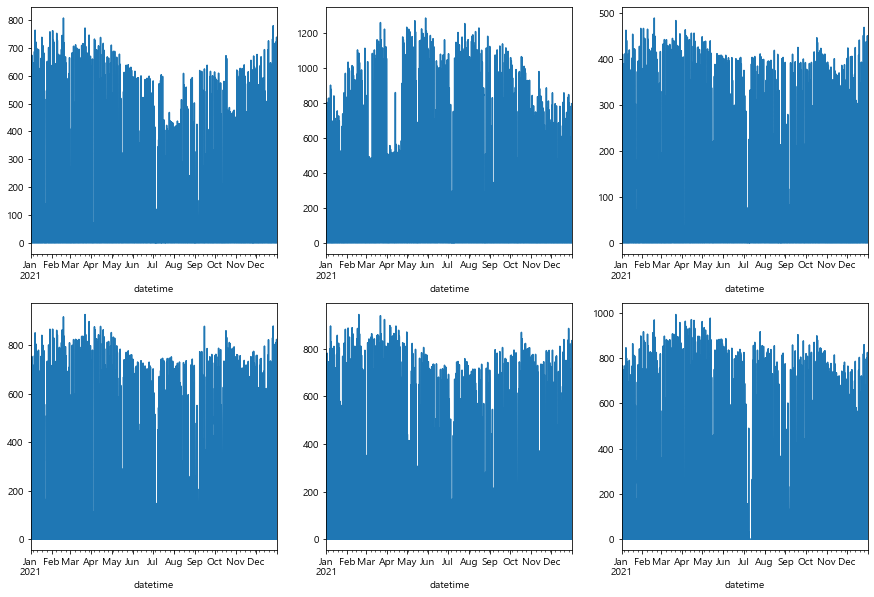

In [56]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
df['하동본부 #1'].plot()
plt.subplot(2,3,2)
df['하동본부 #2'].plot()
plt.subplot(2,3,3)
df['하동본부 #3'].plot()
plt.subplot(2,3,4)
df['하동본부 #4'].plot()
plt.subplot(2,3,5)
df['하동본부 #5'].plot()
plt.subplot(2,3,6)
df['하동본부 #6'].plot()

화촌주민참여형

In [57]:
df1 = pd.read_csv("./datasets/2. 남부/예외/한국남부발전(주)_화촌주민참여형 태양광발전실적_20220630.csv", encoding='cp949')
df1

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별_kw),최소(시간별_kw),1,2,...,15,16,17,18,19,20,21,22,23,24
0,2021-05-04,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
1,2021-05-05,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
2,2021-05-06,1,576.357,24.015,576.357,0,576.357,576.357,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
3,2021-05-07,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
4,2021-05-08,1,0.000,0.000,0.000,0,0.000,0.000,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2022-06-26,1,3240.471,135.020,543.815,0,543.815,0.723,0,0,...,530.075,347.839,326.144,176.451,71.593,0.723,0,0,0,0
419,2022-06-27,1,2986.643,124.443,587.927,0,587.927,3.616,0,0,...,357.963,203.931,212.608,92.564,34.712,3.616,0,0,0,0
420,2022-06-28,1,3286.030,136.918,530.798,0,530.798,11.571,0,0,...,334.099,247.320,119.321,115.705,39.051,11.571,0,0,0,0
421,2022-06-29,1,2574.443,107.268,550.323,0,550.323,4.339,0,0,...,176.451,134.507,104.135,92.564,25.311,7.232,0,0,0,0


In [58]:
df1['호기'].unique()

array([1], dtype=int64)

In [59]:
df1.drop(np.arange(30), axis=0)

,년월일,호기,총량(kw),평균(kw),최대(kw),최소(kw),최대(시간별_kw),최소(시간별_kw),1,2,...,15,16,17,18,19,20,21,22,23,24
30,2021-06-03,1,1133.188,47.216,196.699,0,196.699,1.446,0,0,...,169.219,107.027,81.717,36.881,7.232,0.000,0,0,0,0
31,2021-06-04,1,6378.253,265.761,895.269,0,895.269,5.785,0,0,...,726.774,533.691,438.234,201.038,39.774,6.508,0,0,0,0
32,2021-06-05,1,5830.822,242.951,812.829,0,812.829,6.508,0,0,...,582.865,495.363,355.071,202.484,59.299,6.508,0,0,0,0
33,2021-06-06,1,5799.727,241.655,803.428,0,803.428,7.955,0,0,...,563.340,278.416,398.460,192.360,65.807,9.401,0,0,0,0
34,2021-06-07,1,5336.907,222.371,673.260,0,673.260,5.785,0,0,...,562.617,520.674,382.551,200.315,51.344,5.785,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2022-06-26,1,3240.471,135.020,543.815,0,543.815,0.723,0,0,...,530.075,347.839,326.144,176.451,71.593,0.723,0,0,0,0
419,2022-06-27,1,2986.643,124.443,587.927,0,587.927,3.616,0,0,...,357.963,203.931,212.608,92.564,34.712,3.616,0,0,0,0
420,2022-06-28,1,3286.030,136.918,530.798,0,530.798,11.571,0,0,...,334.099,247.320,119.321,115.705,39.051,11.571,0,0,0,0
421,2022-06-29,1,2574.443,107.268,550.323,0,550.323,4.339,0,0,...,176.451,134.507,104.135,92.564,25.311,7.232,0,0,0,0


In [60]:
df1 = df1.drop(np.arange(30), axis=0)

# 시계열로 변환
df1.index = pd.to_datetime(df1['년월일'])
df1 = df1.drop(['년월일'], axis = 1)

 # 발전량 추출
PV_values = df1[df1.index.year == 2021].iloc[:,7:].shift(periods=1, axis=1,fill_value=0).stack().values

df['화촌주민'] = np.concatenate((np.nan*np.zeros(365*24-len(PV_values)), PV_values), axis=0)

<AxesSubplot:xlabel='datetime'>

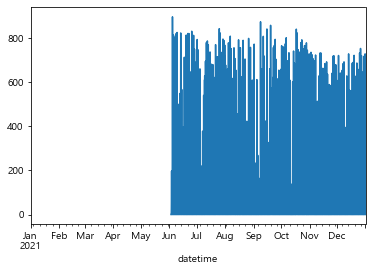

In [61]:
df['화촌주민'].plot()

In [62]:
df

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,안동소내 #1,안동소내 #2,이천d,하동본부 #1,하동본부 #2,하동본부 #3,하동본부 #4,하동본부 #5,하동본부 #6,화촌주민
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3) 데이터 정리

In [63]:
df.columns

Index(['남제주소내', '부산복합자재창고', '부산수처리장', '부산신항', '부산역선상주차장', '부산운동장', '송당리',
       '신인천 1_2단계 주차장', '신인천 북측부지', '신인천 주차장', '신인천소내', '신인천전망대', '신인천해수구취수구',
       '영월본부', '영월철도부지', '용수리', '위미2리', '인천수산정수장', '하동공설운동장', '하동변전소', '하동보건소',
       '하동정수장', '하동하수처리장', '행원소수력', '무릉리', '부산본부 #1', '부산본부 #2', '삼척사택',
       '삼척소내 #1', '삼척소내 #2', '삼척소내 #3', '삼척소내 #4', '안동소내 #1', '안동소내 #2', '이천d',
       '하동본부 #1', '하동본부 #2', '하동본부 #3', '하동본부 #4', '하동본부 #5', '하동본부 #6',
       '화촌주민'],
      dtype='object')

In [64]:
df_PV_Info['발전소명'].values

array(['감우리', '남제주소내', '무릉리 (제주)', '부산 수처리 건물', '부산발전본부', '부산복합',
       '부산복합 2단계', '부산복합 자재창고', '부산신항', '부산역 선상 주차장', '삼척사택', '삼척소내 #1',
       '삼척소내 #2', '삼척소내 #3', '삼척소내 #4', '송당리 (제주)', '신인천 1,2단계주차장',
       '신인천 법사면 전망대', '신인천 본관옥상', '신인천 북측부지', '신인천 소내', '신인천 주차장',
       '신인천 해수취수구', '신풍리 (제주)', '안동발전본부', '안동발전본부 2단계', '영월복합', '영월철도부지',
       '위미2리 제2', '이천D(백사면B)', '인천수산정수장', '제주 용수리', '하동공설운동장', '하동군보건소',
       '하동변전소', '하동정수장', '하동하수처리장', '하동화력 #1', '하동화력 #2', '하동화력 #3',
       '하동화력 #4', '하동화력 #5', '하동화력 #6', '행원소수력', '화촌주민참여형솔라팜'],
      dtype=object)

In [65]:
df_PV_H = pd.DataFrame(np.nan*np.zeros(365*24), index=df.index, columns={'감우리'})
df_PV_H

,감우리
datetime,
2021-01-01 00:00:00,NaN
2021-01-01 01:00:00,NaN
2021-01-01 02:00:00,NaN
2021-01-01 03:00:00,NaN
2021-01-01 04:00:00,NaN
...,...
2021-12-31 19:00:00,NaN
2021-12-31 20:00:00,NaN
2021-12-31 21:00:00,NaN


In [66]:
df.head()

,남제주소내,부산복합자재창고,부산수처리장,부산신항,부산역선상주차장,부산운동장,송당리,신인천 1_2단계 주차장,신인천 북측부지,신인천 주차장,...,안동소내 #1,안동소내 #2,이천d,하동본부 #1,하동본부 #2,하동본부 #3,하동본부 #4,하동본부 #5,하동본부 #6,화촌주민
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [67]:
df_PV_monthly.head()

,삼척사택 태양광(kwh),안동소내 태양광-1(kwh),안동소내 태양광-2(kwh)
년월일,,,
2021-01-01,15948,10846.0,23713.0
2021-02-01,17820,11979.0,31376.0
2021-03-01,16416,12629.0,34368.0
2021-04-01,20448,14387.0,39450.0
2021-05-01,17280,12560.0,34905.0


In [68]:
# df_PV_H['감우리']
df_PV_H['남제주소내'] = df['남제주소내']
df_PV_H['무릉리 (제주)'] = df['무릉리']
df_PV_H['부산 수처리 건물'] = df['부산수처리장']
df_PV_H['부산발전본부'] = df['부산운동장']

df_PV_H['부산복합'] = df['부산본부 #1']
df_PV_H['부산복합 2단계'] = df['부산본부 #2']
df_PV_H['부산복합 자재창고'] = df['부산복합자재창고']
df_PV_H['부산신항'] = df['부산신항']
df_PV_H['부산역 선상 주차장'] = df['부산역선상주차장']

df_PV_H['삼척사택'] = df['삼척사택']
df_PV_H['삼척소내 #1'] = df['삼척소내 #1']
df_PV_H['삼척소내 #2'] = df['삼척소내 #2']
df_PV_H['삼척소내 #3'] = df['삼척소내 #3']
df_PV_H['삼척소내 #4'] = df['삼척소내 #4']

df_PV_H['송당리 (제주)'] = df['송당리']
df_PV_H['신인천 1,2단계주차장'] = df['신인천 1_2단계 주차장']
df_PV_H['신인천 법사면 전망대'] = df['신인천전망대']
df_PV_H['신인천 본관옥상'] = np.nan*np.zeros(365*24)
df_PV_H['신인천 북측부지'] = df['신인천 북측부지']

df_PV_H['신인천 소내'] = df['신인천소내']
df_PV_H['신인천 주차장'] = df['신인천 주차장']
df_PV_H['신인천 해수취수구'] = df['신인천해수구취수구']
df_PV_H['신풍리 (제주)'] = np.nan*np.zeros(365*24)
df_PV_H['안동발전본부'] = df['안동소내 #1']

df_PV_H['안동발전본부 2단계'] = df['안동소내 #2']
df_PV_H['영월복합'] = df['영월본부'] #
df_PV_H['영월철도부지'] = df['영월철도부지']
df_PV_H['위미2리 제2'] = df['위미2리']
df_PV_H['이천D(백사면B)'] = df['이천d']

df_PV_H['인천수산정수장'] = df['인천수산정수장']
df_PV_H['제주 용수리'] = df['용수리']
df_PV_H['하동공설운동장'] = df['하동공설운동장']
df_PV_H['하동군보건소'] = df['하동보건소']
df_PV_H['하동변전소'] = df['하동변전소']

df_PV_H['하동정수장'] = df['하동정수장']
df_PV_H['하동하수처리장'] = df['하동하수처리장']
df_PV_H['하동화력 #1'] = df['하동본부 #1']
df_PV_H['하동화력 #2'] = df['하동본부 #2']
df_PV_H['하동화력 #3'] = df['하동본부 #3']

df_PV_H['하동화력 #4'] = df['하동본부 #4']
df_PV_H['하동화력 #5'] = df['하동본부 #5']
df_PV_H['하동화력 #6'] = df['하동본부 #6']
df_PV_H['행원소수력'] = df['행원소수력']
df_PV_H['화촌주민참여형솔라팜'] = df['화촌주민']

In [69]:
df_PV_H

,감우리,남제주소내,무릉리 (제주),부산 수처리 건물,부산발전본부,부산복합,부산복합 2단계,부산복합 자재창고,부산신항,부산역 선상 주차장,...,하동정수장,하동하수처리장,하동화력 #1,하동화력 #2,하동화력 #3,하동화력 #4,하동화력 #5,하동화력 #6,행원소수력,화촌주민참여형솔라팜
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 01:00:00,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 02:00:00,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 03:00:00,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-01 04:00:00,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 20:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 21:00:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_PV_Info

,발전소명,발전소 주소지,설치용량,설치각,설비용량,도/시,시/군/구,lat_do,lng_do,lat_si,lng_si
44,감우리,"충청북도 음성군 음성읍 감우리 23, 24","554.4kW 모듈 : 440W x 1,260 인버터 : 630kW x 1EA",설치각 : 20˚,554,충청북도,음성군,36.635700,127.491500,36.940000,127.690600
0,남제주소내,제주특별자치도 서귀포시 안덕면 화순해안로 106번길 55,196kW 모듈 :250W x 784 인버터 : 100kW x 2EA,설치각 : 30˚,196,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
1,무릉리 (제주),제주특별자치도 서귀포시 대정읍 무릉리 1193-3 외 3필지,809.2kW 모듈 : 425W x 1904 인버터 : 100kW x 8EA,설치각 : 20˚,809,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
2,부산 수처리 건물,부산광역시 사하구 감천항로 7(감천동) 수처리실,"110.5kW 모듈 : 340Wⅹ325 인버터 : 100kW, 10.5kW",설치각 : 25˚ 입사각 : 23˚,110,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
3,부산발전본부,부산광역시 사하구 감천항로 7(감천동),"1,400.475kW 모듈 : 355Wⅹ3,945 인버터 : 500kWⅹ3EA",설치각 : 25˚,1400,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
6,부산복합,부산광역시 사하구 감천항로 7,"390kW 모듈 :170W x 1,155 인버터 : 100kW x 3EA, 50kW...",설치각 : 21˚~45˚,390,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
4,부산복합 2단계,부산광역시 사하구 감천항로 7(감천동),"501.84kW 모듈 : 340W x 1,476 인버터 : 600kW x 1EA",설치각 : 25˚,502,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
5,부산복합 자재창고,부산광역시 사하구 감천항로 7(감천동),187kW 모듈 : 300Wⅹ624 인버터 : 100kW x 2EA,설치각 : 27˚,187,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
7,부산신항,부산광역시 강서구 성북동 1490,"115kW 모듈 :144Wp x 272, 100Wp x 384, 215Wp x 17...",설치각 : 17˚,115,부산광역시,강서구,35.179953,129.075236,37.550900,126.849700
8,부산역 선상 주차장,부산광역시 동구 초량3동 1187-1,"834kW 모듈 : 400W x 2086, 인버터 : 500kW x 2EA",설치각 : 3˚~23˚,834,부산광역시,동구,35.179953,129.075236,35.886500,128.635500


In [71]:
# df_PV = df[['남제주소내','무릉리']].copy()
# df_PV.columns = ['남제주소내','무릉리 (제주)']
# df_PV['부산 수처리 건물'] = df['부산수처리장']
# df_PV['부산발전본부 1,400kW'] = df['부산본부1'] + df['부산본부2']
# df_PV['부산복합 2단계'] = np.nan*np.zeros(365*24)

# df_PV['부산복합 자재창고'] = df['부산복합자재창고']
# df_PV['부산복합'] = np.nan*np.zeros(365*24)
# df_PV['부산신항'] = df['부산신항']
# df_PV['부산역 선상 주차장'] = df['부산역선상주차장']
# df_PV['이천D(백사면B'] = df['이천d']

# df_PV['삼척 소내#4'] = df['삼척소내4']
# df_PV['삼척사택'] = df['삼척사택']
# df_PV['삼척소내 # 3'] = df['삼척소내3']
# df_PV['삼척소내 #2'] = df['삼척소내2']
# df_PV['삼척소내#1'] = df['삼척소내1']

# df_PV['송당리 (제주)'] = df['송당리']
# df_PV['신인천 1,2단계주차장'] = df['신인천 1_2단계 주차장']
# df_PV['신인천 법사면 전망대'] = df['신인천전망대']
# df_PV['신인천 북측부지'] = df['신인천 북측부지']
# df_PV['신인천 본관옥상'] = np.nan*np.zeros(365*24)

# df_PV['신인천 소내'] = df['신인천소내']
# df_PV['신인천 주차장'] = df['신인천 주차장']
# df_PV['신인천 해수취수구'] = df['신인천해수구취수구']
# df_PV['신풍리 (제주)'] = np.nan*np.zeros(365*24)
# df_PV['안동발전본부 2단계'] = np.nan*np.zeros(365*24)

# df_PV['안동발전본부'] = np.nan*np.zeros(365*24)
# df_PV['영월복합'] = df['영월본부']
# df_PV['영월철도부지'] = df['영월철도부지']
# df_PV['위미2리 제2'] = df['위미2리']
# df_PV['인천수산정수장'] = df['인천수산정수장']

# df_PV['제주 용수리'] = df['용수리']
# df_PV['하동공설운동장'] = df['하동공설운동장']
# df_PV['하동군보건소'] = df['하동보건소']
# df_PV['하동변전소'] = df['하동변전소']
# df_PV['하동정수장'] = df['하동정수장']

# df_PV['하동하수처리장'] = df['하동하수처리장']
# df_PV['하동화력 #1'] = df['하동본부1']
# df_PV['하동화력 #2'] = df['하동본부2']
# df_PV['하동화력 #2'] = df['하동본부3']
# df_PV['하동화력 #4'] = df['하동본부4']

# df_PV['하동화력 #5'] = df['하동본부5']
# df_PV['하동화력 #6'] = df['하동본부6']
# df_PV['화촌주민참여형솔라팜'] = df['화촌주민']
# df_PV['행원소수력'] = df['행원소수력']
# df_PV['감우리'] = np.nan*np.zeros(365*24)

## 2. 지역별 이용률 분석

연중 이용률 계산  
- 발전이용률 = 발전량 / 발전가능량  
- 발전가능량 = 설비용량 * 가동일* 24(시간)  

In [72]:
# df_PV_H
# df_PV_Info
df_PV_monthly

,삼척사택 태양광(kwh),안동소내 태양광-1(kwh),안동소내 태양광-2(kwh)
년월일,,,
2021-01-01,15948,10846.0,23713.0
2021-02-01,17820,11979.0,31376.0
2021-03-01,16416,12629.0,34368.0
2021-04-01,20448,14387.0,39450.0
2021-05-01,17280,12560.0,34905.0
2021-06-01,15030,13019.0,36386.0
2021-07-01,16236,13996.0,38797.0
2021-08-01,12456,10009.0,27780.0
2021-09-01,5310,10283.0,27964.0


In [73]:
df_PV_Info

,발전소명,발전소 주소지,설치용량,설치각,설비용량,도/시,시/군/구,lat_do,lng_do,lat_si,lng_si
44,감우리,"충청북도 음성군 음성읍 감우리 23, 24","554.4kW 모듈 : 440W x 1,260 인버터 : 630kW x 1EA",설치각 : 20˚,554,충청북도,음성군,36.635700,127.491500,36.940000,127.690600
0,남제주소내,제주특별자치도 서귀포시 안덕면 화순해안로 106번길 55,196kW 모듈 :250W x 784 인버터 : 100kW x 2EA,설치각 : 30˚,196,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
1,무릉리 (제주),제주특별자치도 서귀포시 대정읍 무릉리 1193-3 외 3필지,809.2kW 모듈 : 425W x 1904 인버터 : 100kW x 8EA,설치각 : 20˚,809,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
2,부산 수처리 건물,부산광역시 사하구 감천항로 7(감천동) 수처리실,"110.5kW 모듈 : 340Wⅹ325 인버터 : 100kW, 10.5kW",설치각 : 25˚ 입사각 : 23˚,110,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
3,부산발전본부,부산광역시 사하구 감천항로 7(감천동),"1,400.475kW 모듈 : 355Wⅹ3,945 인버터 : 500kWⅹ3EA",설치각 : 25˚,1400,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
6,부산복합,부산광역시 사하구 감천항로 7,"390kW 모듈 :170W x 1,155 인버터 : 100kW x 3EA, 50kW...",설치각 : 21˚~45˚,390,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
4,부산복합 2단계,부산광역시 사하구 감천항로 7(감천동),"501.84kW 모듈 : 340W x 1,476 인버터 : 600kW x 1EA",설치각 : 25˚,502,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
5,부산복합 자재창고,부산광역시 사하구 감천항로 7(감천동),187kW 모듈 : 300Wⅹ624 인버터 : 100kW x 2EA,설치각 : 27˚,187,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
7,부산신항,부산광역시 강서구 성북동 1490,"115kW 모듈 :144Wp x 272, 100Wp x 384, 215Wp x 17...",설치각 : 17˚,115,부산광역시,강서구,35.179953,129.075236,37.550900,126.849700
8,부산역 선상 주차장,부산광역시 동구 초량3동 1187-1,"834kW 모듈 : 400W x 2086, 인버터 : 500kW x 2EA",설치각 : 3˚~23˚,834,부산광역시,동구,35.179953,129.075236,35.886500,128.635500


설비용량

In [74]:
df_PV_Gen_Info = df_PV_Info[['발전소명','설비용량']].copy()
df_PV_Gen_Info.head()

,발전소명,설비용량
44,감우리,554
0,남제주소내,196
1,무릉리 (제주),809
2,부산 수처리 건물,110
3,부산발전본부,1400


연중 발전

In [75]:
df_PV_Gen_Info['연중 발전량'] = df_PV_H.sum().values
df_PV_Gen_Info.head()

,발전소명,설비용량,연중 발전량
44,감우리,554,0.000
0,남제주소내,196,167461.981
1,무릉리 (제주),809,641835.870
2,부산 수처리 건물,110,114399.440
3,부산발전본부,1400,2007378.000


가동일

In [76]:
# df_PV_H.count()
df_PV_Gen_Info['연중 가동시간'] = df_PV_H.count().values
df_PV_Gen_Info.head()

,발전소명,설비용량,연중 발전량,연중 가동시간
44,감우리,554,0.000,0
0,남제주소내,196,167461.981,8760
1,무릉리 (제주),809,641835.870,5520
2,부산 수처리 건물,110,114399.440,8760
3,부산발전본부,1400,2007378.000,8760


연중 발전가능량

In [77]:
df_PV_Gen_Info['연중 발전가능량'] = df_PV_Gen_Info['설비용량'] * df_PV_Gen_Info['연중 가동시간']
df_PV_Gen_Info.head()

,발전소명,설비용량,연중 발전량,연중 가동시간,연중 발전가능량
44,감우리,554,0.000,0,0
0,남제주소내,196,167461.981,8760,1716960
1,무릉리 (제주),809,641835.870,5520,4465680
2,부산 수처리 건물,110,114399.440,8760,963600
3,부산발전본부,1400,2007378.000,8760,12264000


In [78]:
df_PV_Gen_Info['연중 발전량'] / df_PV_Gen_Info['연중 발전가능량'].round(2)

44         NaN
0     0.097534
1     0.143726
2     0.118721
3     0.163681
6     0.055156
4     0.143960
5     0.149945
7     0.109000
8     0.145624
11         NaN
14    0.154193
13    0.159234
12    0.154497
10    0.156391
15    0.136893
16    0.128592
17    0.110069
19         NaN
18    0.185659
20    0.140577
21    0.138852
22    0.133838
23         NaN
25         NaN
24         NaN
26    0.030115
27    0.147556
28    0.133605
9     0.155385
29    0.145757
30    0.147693
31    0.121242
32    0.024192
33    0.155869
34    0.123570
35    0.032872
36    0.127662
37    0.107429
38    0.138149
39    0.162642
40    0.164522
41    0.170380
43    0.000384
42    0.154986
dtype: float64

In [79]:
df_PV_Gen_Info['연중 이용률'] = (df_PV_Gen_Info['연중 발전량'] / df_PV_Gen_Info['연중 발전가능량']*100).round(1)
df_PV_Gen_Info.head()

,발전소명,설비용량,연중 발전량,연중 가동시간,연중 발전가능량,연중 이용률
44,감우리,554,0.000,0,0,NaN
0,남제주소내,196,167461.981,8760,1716960,9.8
1,무릉리 (제주),809,641835.870,5520,4465680,14.4
2,부산 수처리 건물,110,114399.440,8760,963600,11.9
3,부산발전본부,1400,2007378.000,8760,12264000,16.4


In [80]:
df_PV_Gen_Info['도/시'] = df_PV_Info['도/시']
df_PV_Gen_Info['시/군/구'] = df_PV_Info['시/군/구']
df_PV_Gen_Info['lat_do'] = df_PV_Info['lat_do']
df_PV_Gen_Info['lng_do'] = df_PV_Info['lng_do']
df_PV_Gen_Info['lat_si'] = df_PV_Info['lat_si']
df_PV_Gen_Info['lng_si'] = df_PV_Info['lng_si']
df_PV_Gen_Info

,발전소명,설비용량,연중 발전량,연중 가동시간,연중 발전가능량,연중 이용률,도/시,시/군/구,lat_do,lng_do,lat_si,lng_si
44,감우리,554,0.000,0,0,NaN,충청북도,음성군,36.635700,127.491500,36.940000,127.690600
0,남제주소내,196,167461.981,8760,1716960,9.8,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
1,무릉리 (제주),809,641835.870,5520,4465680,14.4,제주특별자치도,서귀포시,33.488774,126.498708,33.257297,126.515299
2,부산 수처리 건물,110,114399.440,8760,963600,11.9,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
3,부산발전본부,1400,2007378.000,8760,12264000,16.4,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
6,부산복합,390,188433.288,8760,3416400,5.5,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
4,부산복합 2단계,502,633065.760,8760,4397520,14.4,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
5,부산복합 자재창고,187,245628.240,8760,1638120,15.0,부산광역시,사하구,35.179953,129.075236,35.104100,128.975100
7,부산신항,115,109806.120,8760,1007400,10.9,부산광역시,강서구,35.179953,129.075236,37.550900,126.849700
8,부산역 선상 주차장,834,1063906.560,8760,7305840,14.6,부산광역시,동구,35.179953,129.075236,35.886500,128.635500


### 2.1 지역별 연중 이용률 시각화

1) 도/시별 지도 시각화

In [81]:
map = folium.Map(location=[35.7,128],zoom_start=6.5)

for i in range(len(df_PV_Gen_Info)):
#     print(i)
    
    name = df_PV_Gen_Info['발전소명'][i]
    cap = df_PV_Gen_Info['연중 이용률'][i]
    popup = f"{name}: {cap}kW"
    
    folium.CircleMarker(location=[df_PV_Gen_Info['lat_do'][i],df_PV_Gen_Info['lng_do'][i]],
                  radius=df_PV_Gen_Info['연중 이용률'][i],
                  popup = popup,
                  color="#3186cc",
                  fill_color="#3186cc",
                 ).add_to(map)

map

In [82]:
# map저장
map.save('한국남부발전소 태양광발전소 연중 이용률.html')

2) 시/군/구별 연중 이용률 시각화

In [83]:
df_Si = df_PV_Gen_Info[['시/군/구','연중 이용률','lat_si','lng_si']].groupby(['시/군/구','lat_si','lng_si'], as_index=False).mean()
df_Si

,시/군/구,lat_si,lng_si,연중 이용률
0,강서구,37.550900,126.849700,10.900000
1,남동구,37.446902,126.731513,14.600000
2,동구,35.886500,128.635500,14.600000
3,사하구,35.104100,128.975100,12.640000
4,삼척시,37.449874,129.165297,15.575000
5,서구,37.545000,126.676000,13.983333
6,서귀포시,33.257297,126.515299,12.533333
7,안동시,36.563489,128.726080,NaN
8,영월군,37.183498,128.461981,8.900000
9,음성군,36.940000,127.690600,NaN


In [84]:
df_Si.iloc[:,1:]

,lat_si,lng_si,연중 이용률
0,37.550900,126.849700,10.900000
1,37.446902,126.731513,14.600000
2,35.886500,128.635500,14.600000
3,35.104100,128.975100,12.640000
4,37.449874,129.165297,15.575000
5,37.545000,126.676000,13.983333
6,33.257297,126.515299,12.533333
7,36.563489,128.726080,NaN
8,37.183498,128.461981,8.900000
9,36.940000,127.690600,NaN


In [85]:
map = folium.Map(location=[35.7,128],zoom_start=6.5)

for i in range(len(df_Si)):
#     print(i)
    
    name = df_Si['시/군/구'][i]
    cap = df_Si['연중 이용률'][i].round(2)
    popup = f"{name}: {cap}%"
    
    folium.CircleMarker(location = [df_Si['lat_si'][i],df_Si['lng_si'][i]],
                        radius = df_Si['연중 이용률'][i],
                        popup = popup,
                        color = "#FF0000",
                        tooltip =popup, 
                        fill = True,
                        fill_color = "#3186cc",
                       ).add_to(map)

map